<a href="https://colab.research.google.com/github/GustavoHFMO/GrupoSerDisciplinas/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código adaptado de: https://www.datatechnotes.com/2020/03/simple-autoencoder-example-with-keras-in-python.html

In [1]:
# importando as bibliotecas
from keras.datasets.mnist import load_data
from keras.layers import Input, LeakyReLU
from keras.layers import Dense
from keras.models import Model
import matplotlib.pyplot as plt
from numpy import reshape

In [2]:
# importando o conjunto de dados
(xtrain, _), (xtest, _) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# normalizando os dados para que eles fiquem no intervalo de [0, 1]
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.

In [4]:
# obtendo o tamanho dos dados para ajustar a entrada da rede
input_size = xtrain.shape[1] * xtrain.shape[2]
latent_size = 16

In [5]:
# formatando os dados para que a rede consiga ler
x_train = xtrain.reshape((len(xtrain), input_size))
x_test = xtest.reshape((len(xtest), input_size))

In [6]:
# Encoder - definindo a estrutura da etapa de comprimir os dados
enc_input = Input(shape=(input_size,))
enc_dense1 = Dense(units=256, activation="relu")(enc_input)
enc_activ1 = LeakyReLU()(enc_dense1)
enc_dense2 = Dense(units=latent_size)(enc_activ1)
enc_output = LeakyReLU()(enc_dense2)
encoder = Model(enc_input, enc_output)
encoder.summary()

# Decoder - definindo a estrutura da etapa de reconstruir os dados
dec_input = Input(shape=(latent_size,))
dec_dense1 = Dense(units=256, activation="relu")(dec_input)
dec_activ1 = LeakyReLU()(dec_dense1)
dec_dense2 = Dense(units=input_size, activation='sigmoid')(dec_activ1)
dec_output = LeakyReLU()(dec_dense2)
decoder = Model(dec_input, dec_output)
decoder.summary()

# Autoencoder - Agrupando as etapas de codificação e decodificação no modelo
aen_input = Input(shape=(input_size,))
aen_enc_output = encoder(aen_input)
aen_dec_output = decoder(aen_enc_output)
aen = Model(aen_input, aen_dec_output)
aen.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4112      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
Total params: 205,072
Trainable params: 205,072
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Sh

In [7]:
# definindo o algoritmo de otimização e a função de custo
aen.compile(optimizer="rmsprop", loss="binary_crossentropy")

In [8]:
# iniciando o treinamento do autoencoder
aen.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True)

Epoch 1/20
235/235 [==============================] - 6s 23ms/step - loss: 0.1997
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1459
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1322
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1238
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1184
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1146
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1118
Epoch 8/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1096
Epoch 9/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1077
Epoch 10/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1062
Epoch 11/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1051
Epoch 12/20
235/235 [==============================] - 5s 23ms/step - loss: 0.1040
Epoch 13/20
2

In [9]:
# realizando a previsão do conjunto de teste com o modelo treinado
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)
pred_images = reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28)) 

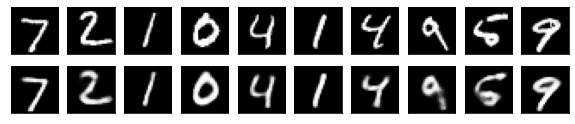

In [10]:
# mostrando visualmente as previsões do modelo 
n = 10
plt.figure(figsize=(10, 2))
for i in range(n): 
 ax = plt.subplot(2, n, i + 1)
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 plt.imshow(xtest[i].reshape(28, 28))
 plt.gray()
 
 ax = plt.subplot(2, n, i + 1 + n)
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 plt.imshow(pred_images[i].reshape(28, 28))

plt.show()